In [1]:
import pandas as pd
import sys
from DMS_utils import plot_positions_hm, plot_risk_hist, prepare_full_df, plot_dms_heatmap, export_colored_pdb
sys.path.append("../../")
from plots_interpretation import visualize_structure_continuous_color, create_plot_grid, plot_probs_along_seq

# PA PBP3

In [3]:
selected_gene = 'pbp3'
selected_org = 'Pseudomonas_aeruginosa'
protein_id = 'G3XD46'
wt = 'MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKGQGDARSVRHIAIPAHRGLITDRNGEPLAVSTPVTTLWANPKELMTAKERWPQLAAALGQDTKLFADRIEQNAEREFIYLVRGLTPEQGEGVIALKVPGVYSIEEFRRFYPAGEVVAHAVGFTDVDDRGREGIELAFDEWLAGVPGKRQVLKDRRGRVIKDVQVTKNAKPGKTLALSIDLRLQYLAHRELRNALLENGAKAGSLVIMDVKTGEILAMTNQPTYNPNNRRNLQPAAMRNRAMIDVFEPGSTVKPFSMSAALASGRWKPSDIVDVYPGTLQIGRYTIRDVSRNSRQLDLTGILIKSSNVGISKIAFDIGAESIYSVMQQVGLGQDTGLGFPGERVGNLPNHRKWPKAETATLAYGYGLSVTAIQLAHAYAALANDGKSVPLSMTRVDRVPDGVQVISPEVASTVQGMLQQVVEAQGGVFRAQVPGYHAAGKSGTARKVSVGTKGYRENAYRSLFAGFAPATDPRIAMVVVIDEPSKAGYFGGLVSAPVFSKVMAGALRLMNVPPDNLPTATEQQQVNAAPAKGGRG'

preds_path = 'inputs/pa_pbp3_dms_predict.csv'
original_data_path = 'inputs/combined_data_gene_filtered_allcols.csv'
pdb_folder = f'inputs/structure_files/'

In [4]:
full_data = prepare_full_df(preds_path, original_data_path, wt, selected_org, selected_gene, protein_id)

For Pseudomonas_aeruginosa pbp3:

Resistance mutations to: [nan 'carbapenem']

N resistant mutations in original data: 21
Resistant mutations in original data: ['G63S', 'Y367C', 'S368L', 'H394R', 'A419G', 'N427L', 'N427S', 'L434V', 'A454V', 'Q458R', 'L461V', 'V471G', 'Q475R', 'R504C', 'R504L', 'F507L', 'V523A', 'V523M', 'P527S', 'F533L', 'S538L']

N sensitive mutations in original data: 4
Sensitive mutations in original data: ['F167L', 'K214N', 'E241D', 'L249V']

Prediction counts: binary_predictions
1    6359
0    5221
Name: count, dtype: int64


In [5]:
full_data.head()

,inputs,probabilities,binary_predictions,target_id,uniprot_id,organism,gene,protein_change,wt_aa,mt_aa,position,alphafold_position,label,tag,antibiotic_class,antibiotic_subclass,antibiotic_codes,antibiotic_standardised,wt_sequence,risk
0,"[0.004037728998810053, -0.11685473471879959, 0...",0.178964,0,Pseudomonas_aeruginosa.pbp3.M1A,G3XD46,Pseudomonas_aeruginosa,pbp3,M1A,M,A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKG...,Low
1,"[0.004037728998810053, -0.11685473471879959, 0...",0.163389,0,Pseudomonas_aeruginosa.pbp3.M1R,G3XD46,Pseudomonas_aeruginosa,pbp3,M1R,M,R,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKG...,Low
2,"[0.004037728998810053, -0.11685473471879959, 0...",0.174091,0,Pseudomonas_aeruginosa.pbp3.M1N,G3XD46,Pseudomonas_aeruginosa,pbp3,M1N,M,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKG...,Low
3,"[0.004037728998810053, -0.11685473471879959, 0...",0.188930,0,Pseudomonas_aeruginosa.pbp3.M1D,G3XD46,Pseudomonas_aeruginosa,pbp3,M1D,M,D,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKG...,Low
4,"[0.004037728998810053, -0.11685473471879959, 0...",0.208052,0,Pseudomonas_aeruginosa.pbp3.M1C,G3XD46,Pseudomonas_aeruginosa,pbp3,M1C,M,C,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MKLNYFQGALYPWRFCVIVGLLLAMVGAIVWRIVDLHVIDHDFLKG...,Low


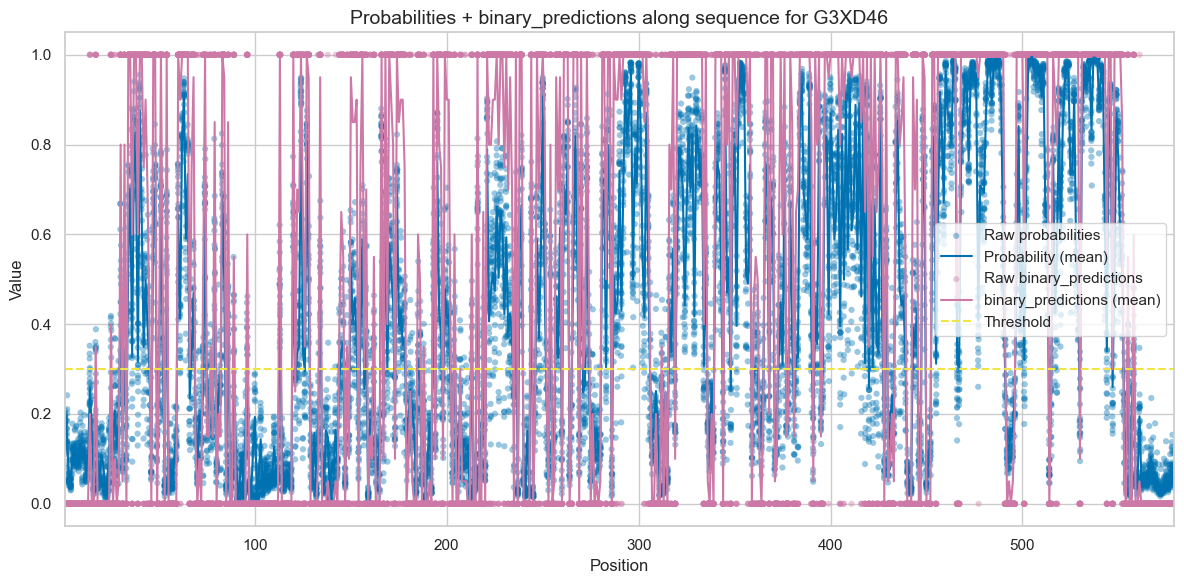

In [6]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True) 

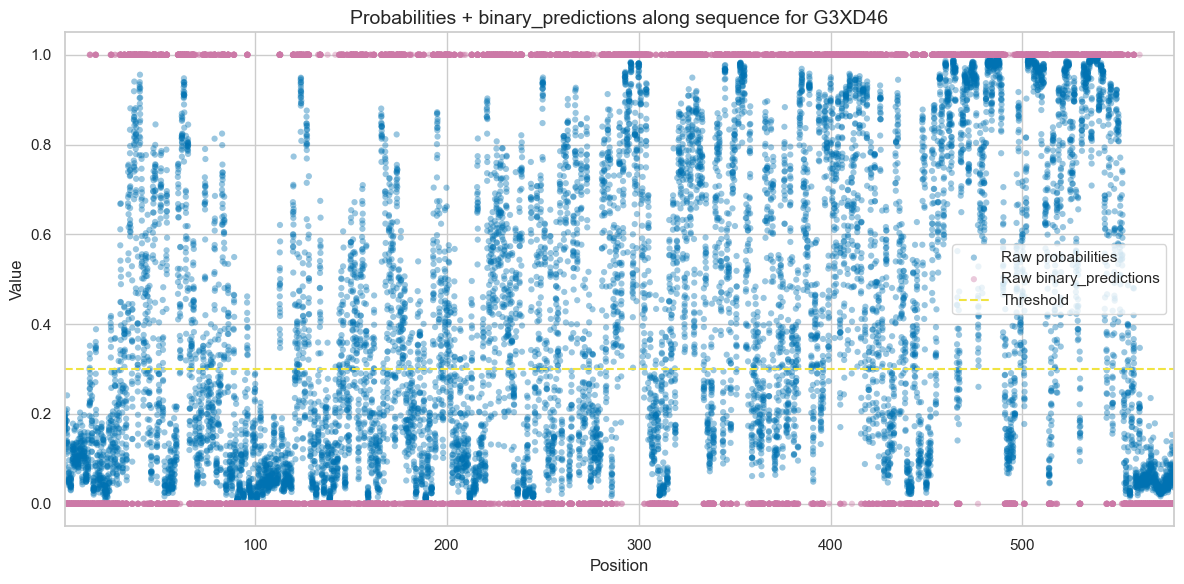

In [7]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True, mode='points') 

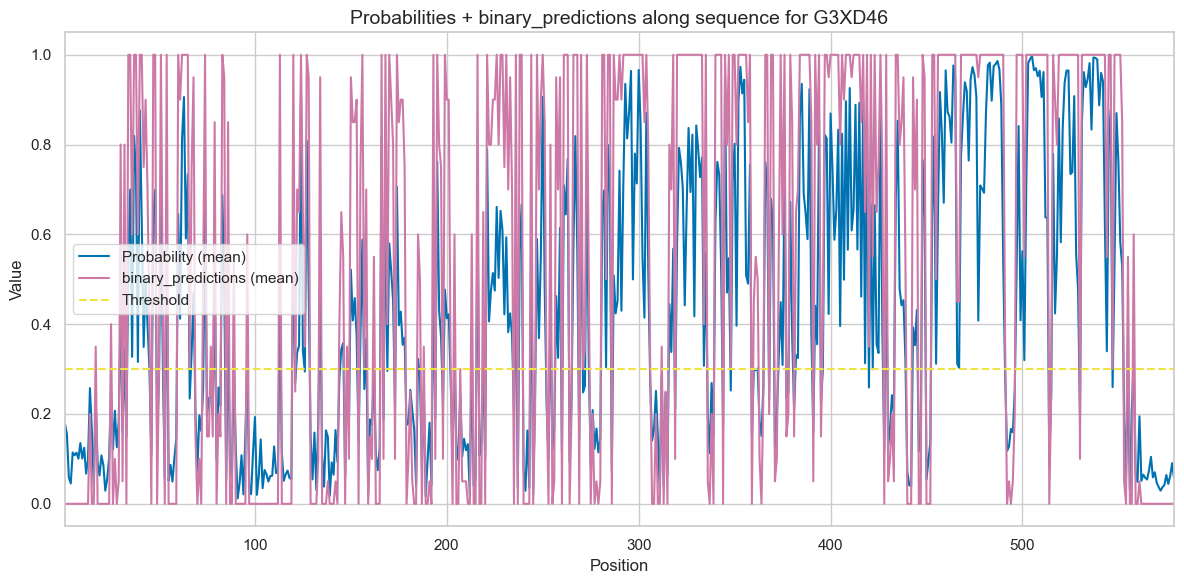

In [8]:
plot_probs_along_seq(full_data, protein_id, feature = 'binary_predictions',fill_missing=True, mode='lines') 

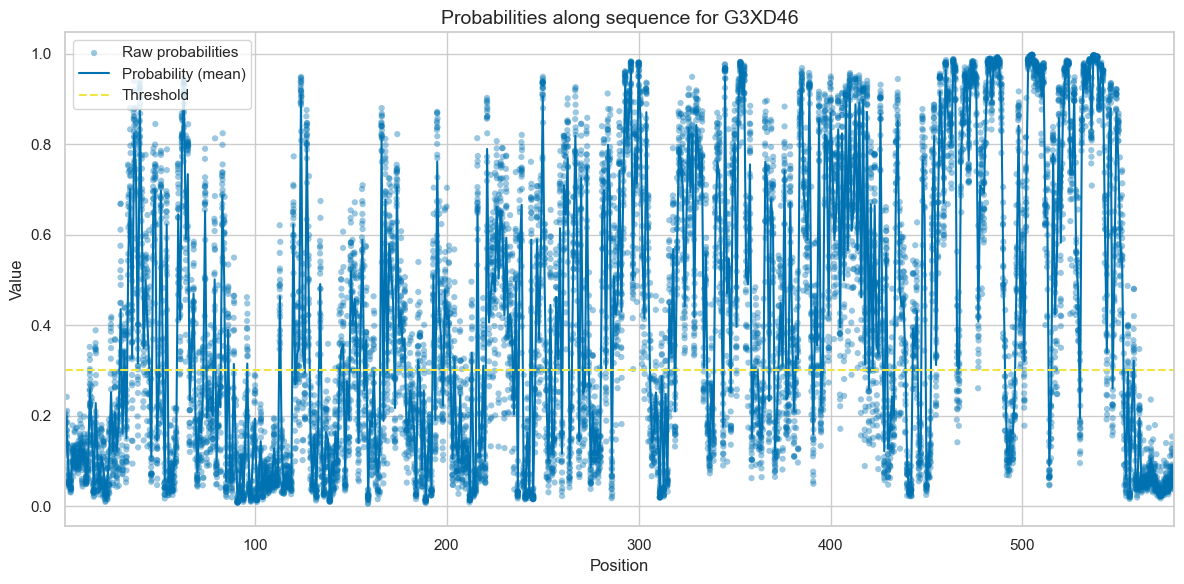

In [9]:
plot_probs_along_seq(full_data, protein_id, fill_missing=True)

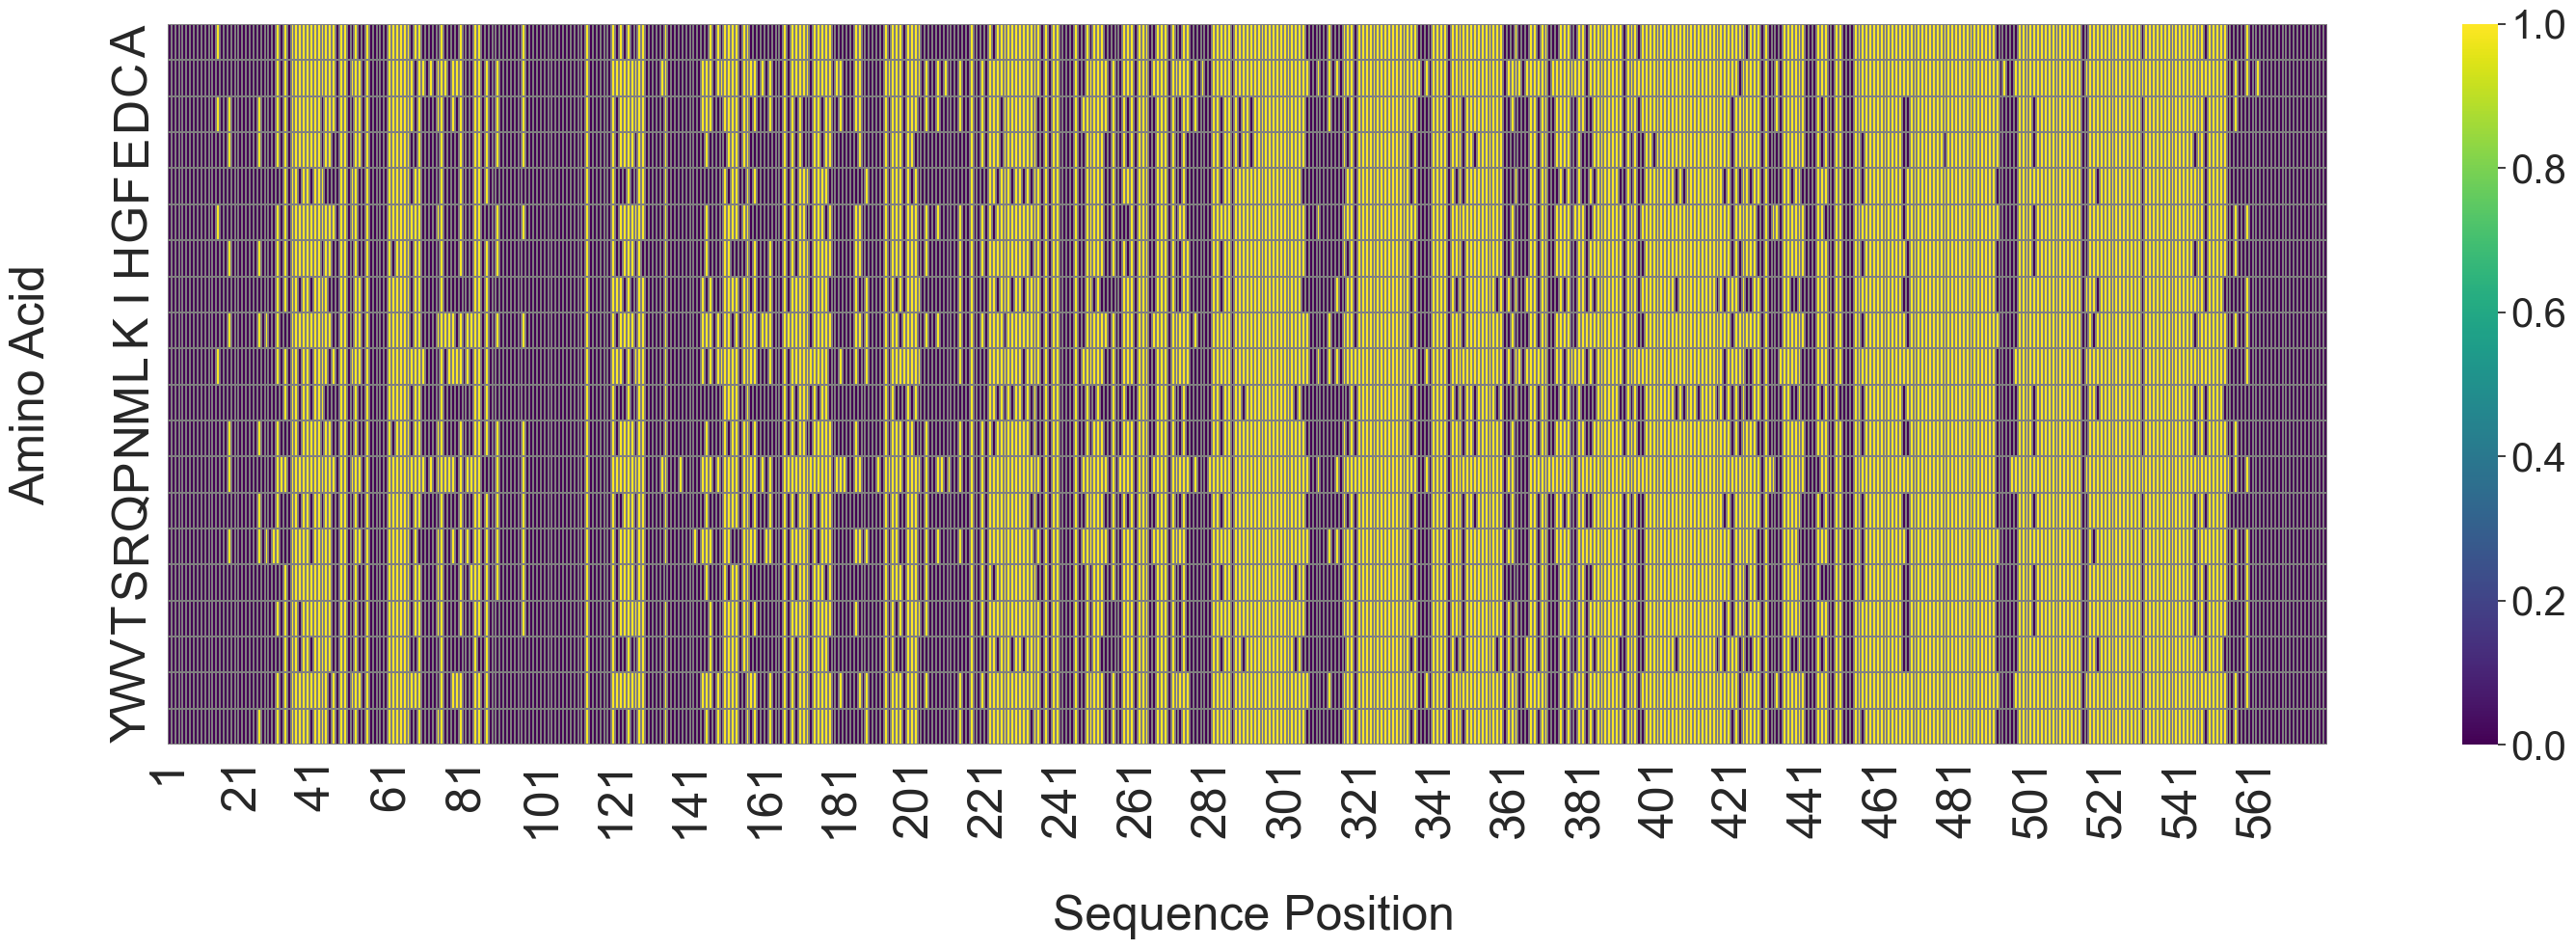

In [10]:
heatmap_df = plot_dms_heatmap(full_data, 'binary_predictions', selected_org, selected_gene)

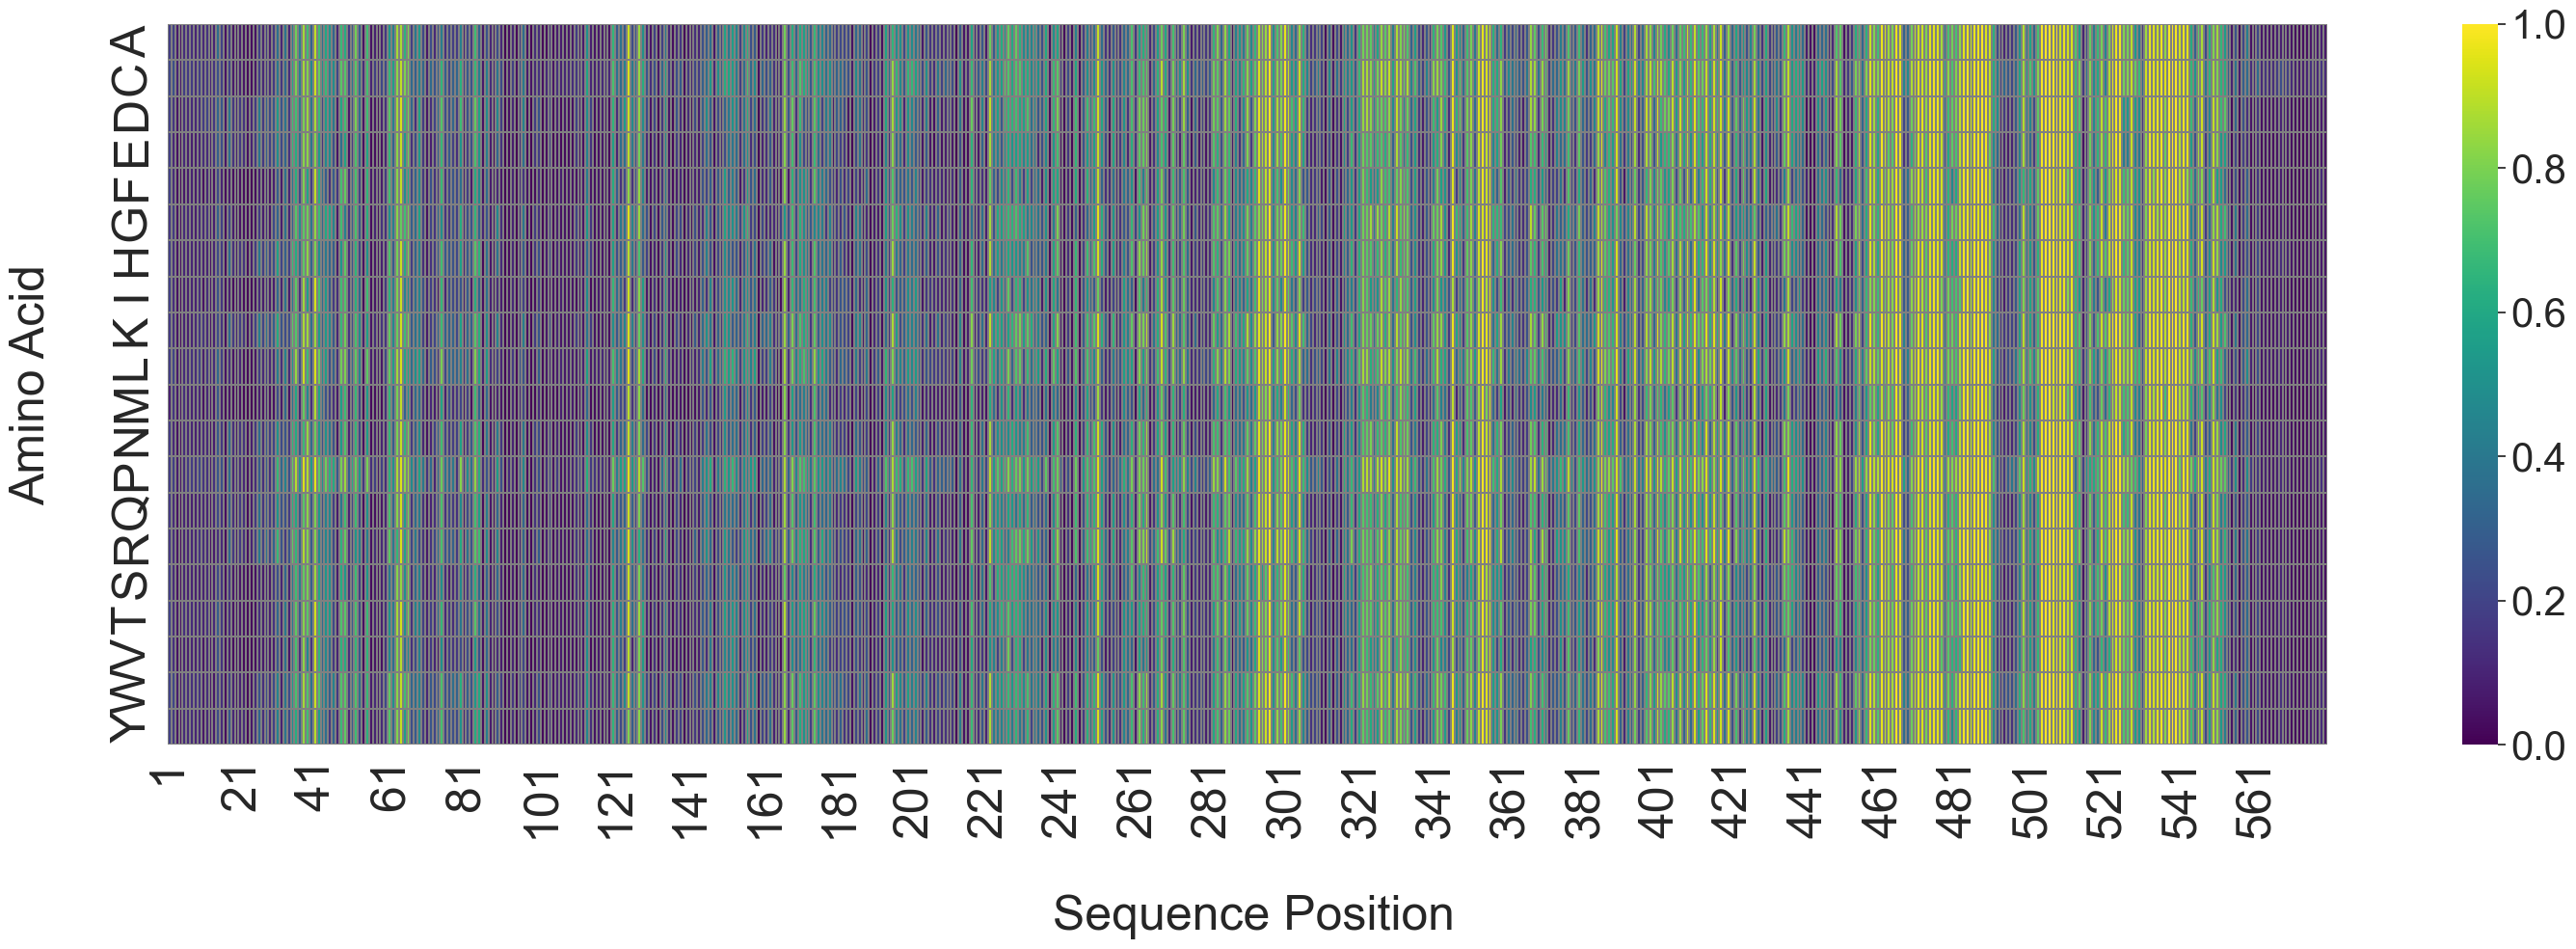

In [11]:
heatmap_df_probs = plot_dms_heatmap(full_data, 'probabilities', selected_org, selected_gene)

In [12]:
view = visualize_structure_continuous_color(pdb_file = f"{pdb_folder}{protein_id}.pdb", 
                                             value_df= full_data[full_data['uniprot_id']==protein_id], 
                                             value_col= 'probabilities',
                                             position_col = 'position', 
                                             chain= 'A',colormap= "viridis")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
export_colored_pdb(
    pdb_file=f"{pdb_folder}{protein_id}.pdb",
    value_df=full_data[full_data['uniprot_id']==protein_id],
    value_col="probabilities",
    position_col="position",
    chain="A",
    out_pdb=f"colored_{selected_org}_{selected_gene}.pdb"
)

Saved colored_Pseudomonas_aeruginosa_pbp3.pdb with values in B-factor column


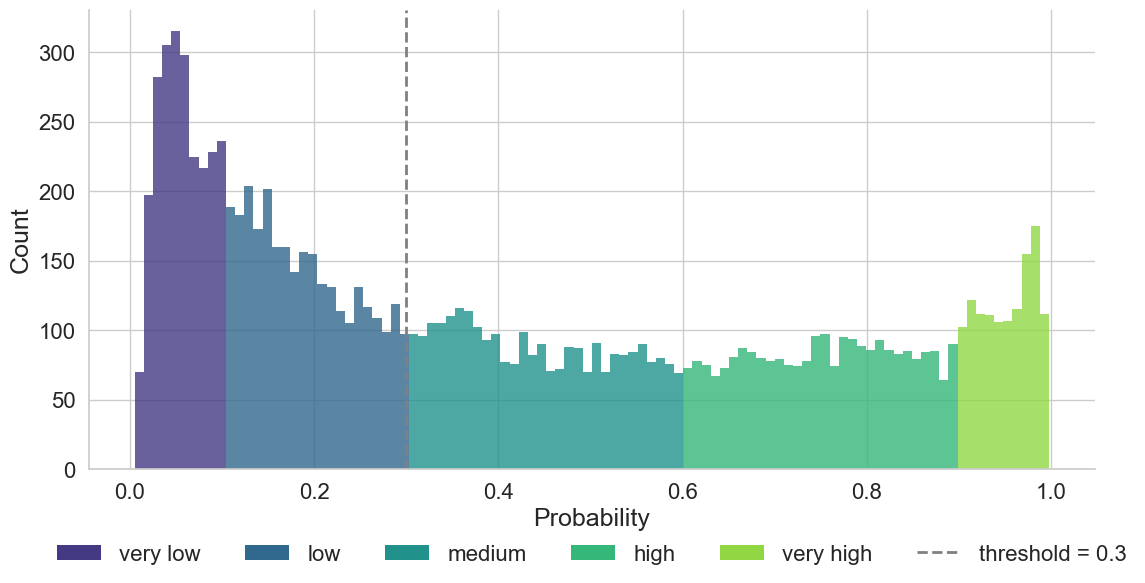

(<Figure size 1200x600 with 1 Axes>,
 <Axes: xlabel='Probability', ylabel='Count'>)

In [14]:
plot_risk_hist(
    full_data['probabilities'],
    selected_gene,
    selected_org,
    figsize=(12,6),
    cmap="viridis",
    alpha=0.8
)

In [15]:
full_data.risk.value_counts()/full_data.shape[0]*100

risk
Low          25.483592
Medium       23.082902
High         21.424870
Very Low     19.602763
Very High    10.405872
Name: count, dtype: float64

In [16]:
full_data.risk.value_counts()

risk
Low          2951
Medium       2673
High         2481
Very Low     2270
Very High    1205
Name: count, dtype: int64

In [17]:
def plot_random_position_heatmap(risk_group, full_data, heatmap_df, wt, selected_org, selected_gene):
    position = list(full_data[(full_data['tag']!='original')&(full_data['risk']==risk_group)].sort_values(by='probabilities', ascending=False)['position'])[0]
    posititon_df = pd.DataFrame(heatmap_df[position])
    plot_positions_hm(posititon_df, risk_group, selected_org, selected_gene)
    print(f'Most likely resistant = {posititon_df.idxmax().item()}')
    wt_res = wt[posititon_df.columns.item()-1]
    print(f'WT residue = {wt_res}')
    wt_drop = posititon_df.drop(index=wt_res)
    print(f'Least likely resistant (not wt) = {wt_drop.idxmin().item()}')

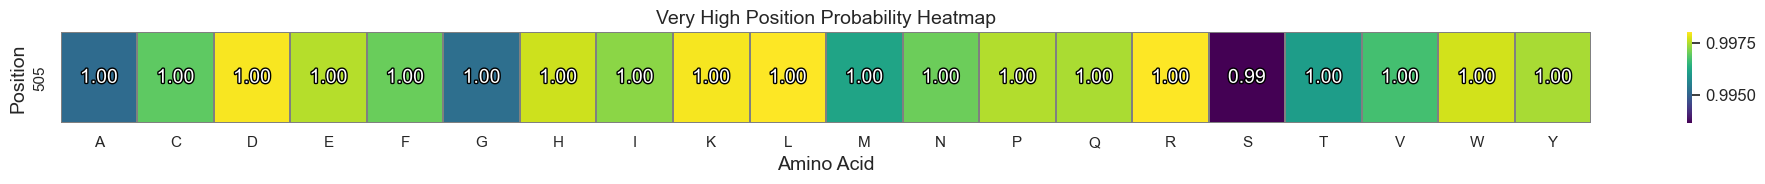

Most likely resistant = R
WT residue = S
Least likely resistant (not wt) = A


In [18]:
plot_random_position_heatmap('Very High', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

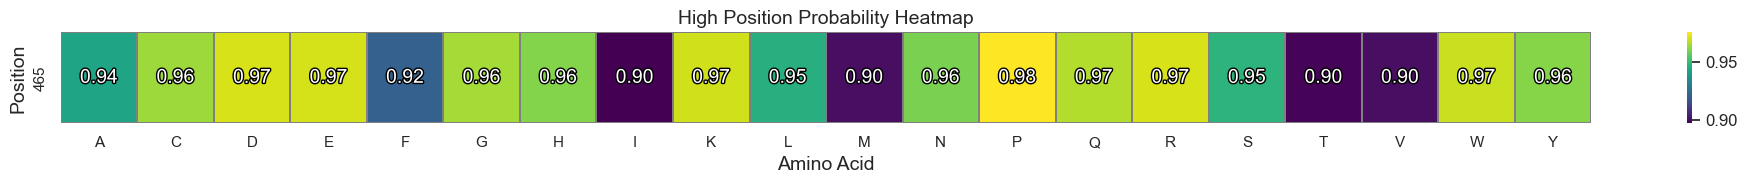

Most likely resistant = P
WT residue = V
Least likely resistant (not wt) = I


In [19]:
plot_random_position_heatmap('High', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

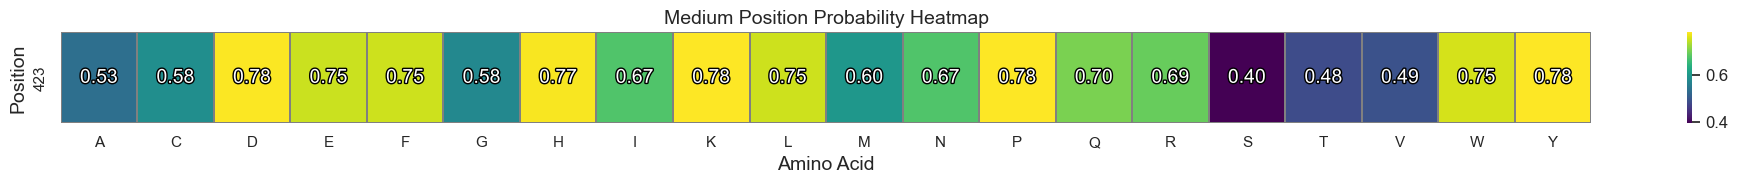

Most likely resistant = K
WT residue = A
Least likely resistant (not wt) = S


In [20]:
plot_random_position_heatmap('Medium', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

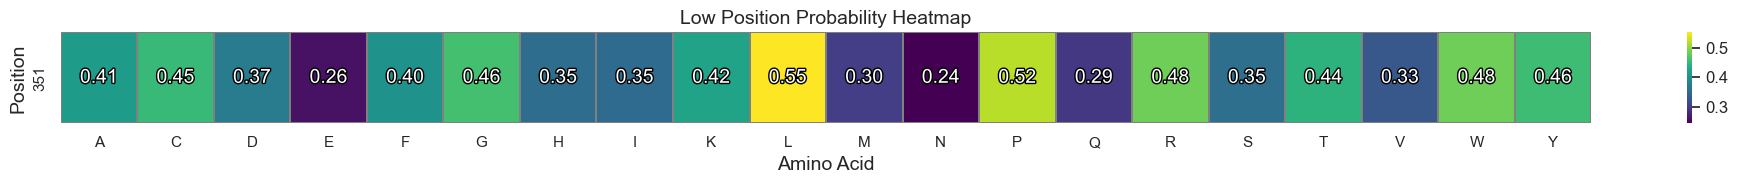

Most likely resistant = L
WT residue = N
Least likely resistant (not wt) = E


In [21]:
plot_random_position_heatmap('Low', full_data, heatmap_df_probs, wt, selected_org, selected_gene)

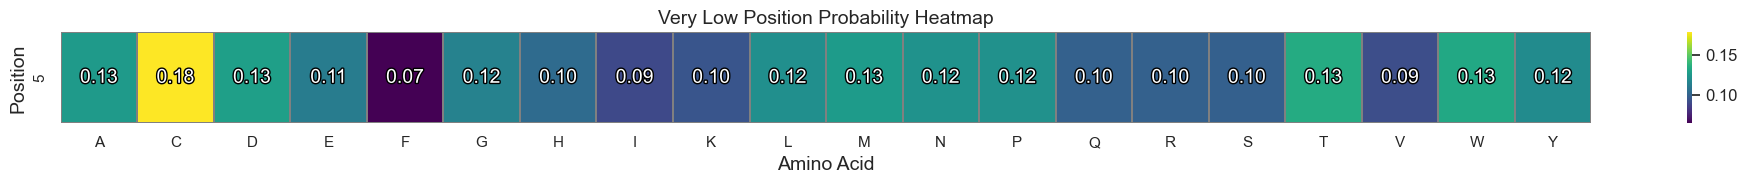

Most likely resistant = C
WT residue = Y
Least likely resistant (not wt) = F


In [22]:
plot_random_position_heatmap('Very Low', full_data, heatmap_df_probs, wt, selected_org, selected_gene)